#### Importing the required libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



#### Loading the dataset and displaying initial few rows 

In [2]:
# Loading dataset
data = pd.read_csv('data2.csv')

# Display the first few rows to understand its structure
data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Prepare the dataset by splitting it into features ('X') and the target variable ('Y')


In [3]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)  
# Here, we assume 'M' is malignant and code it as 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Question 1a. Train a DT classifier with Entropy (C1) and GINI (C2) and compare the performance

In [4]:
#Training the Decision Tree Classifiers with both the Entropy and Gini criteria

dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_gini = DecisionTreeClassifier(criterion='gini')

dt_entropy.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)


DecisionTreeClassifier()

In [5]:
#Evaluate and compare the performance on the test set

y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(f'Accuracy using Entropy: {accuracy_entropy}')
print(f'Accuracy using Gini: {accuracy_gini}')


Accuracy using Entropy: 0.9590643274853801
Accuracy using Gini: 0.9181286549707602


### Question 1b. Visualize the C1 and C2 by using the “graphviz” library

In [6]:
#Adding graphviz to the system directory
import os

os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin/'


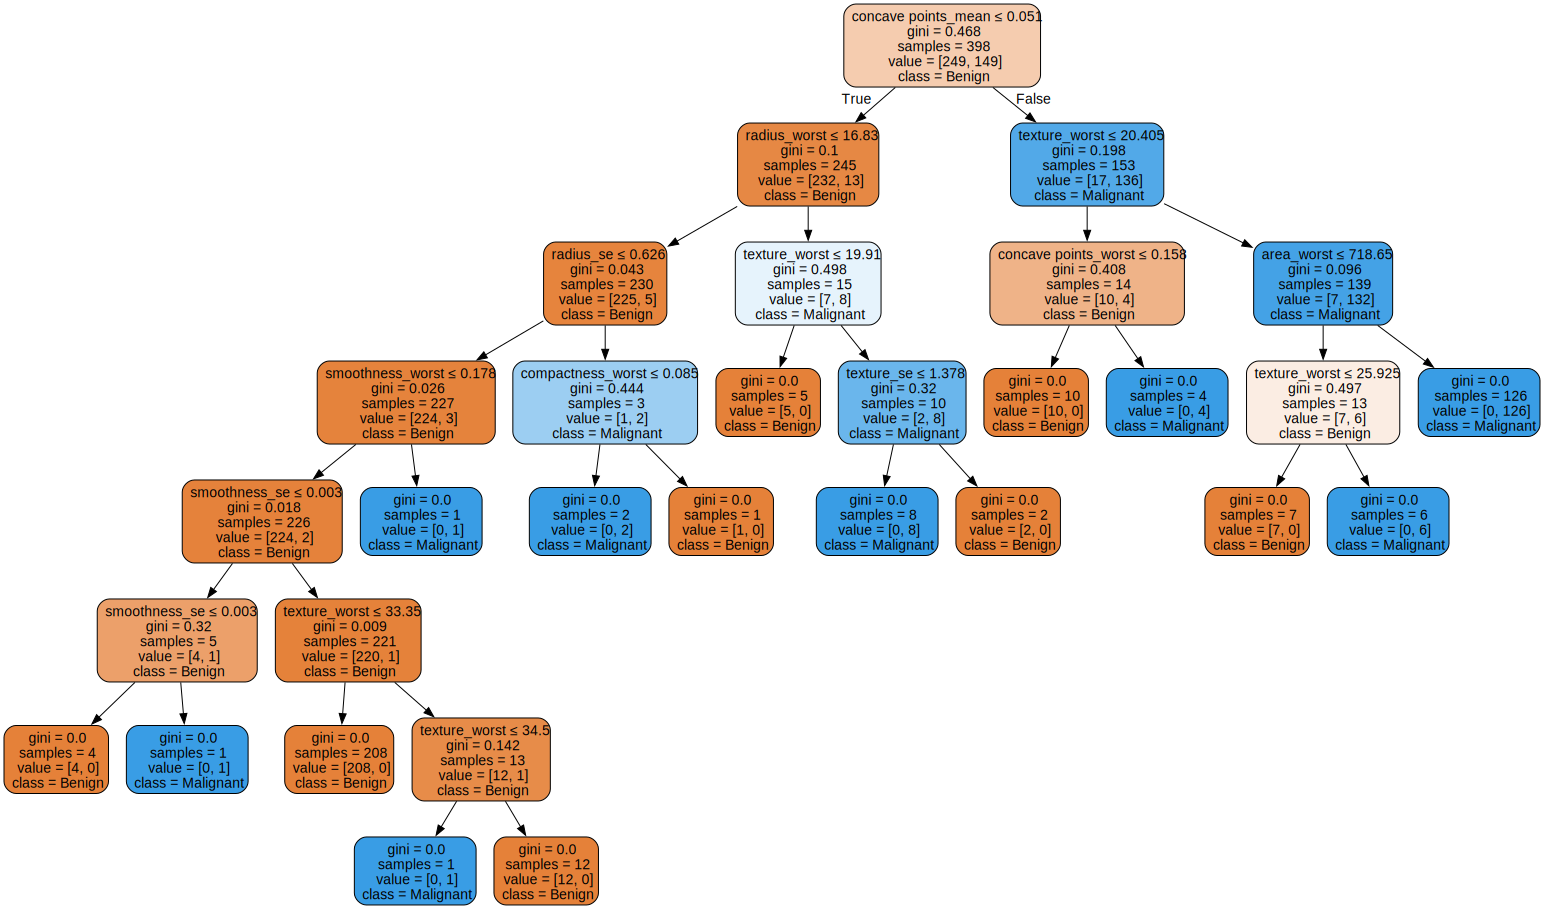

In [7]:
from sklearn.tree import export_graphviz
import graphviz

# Generating the visualization
def visualize_decision_tree(decision_tree, feature_names, class_names, criterion):
    
    #creating DOT data
    dot_data = export_graphviz(decision_tree,
                               out_file=None,  
                               feature_names=feature_names,
                               class_names=class_names,
                               filled=True,  
                               rounded=True,  
                               special_characters=True)
    graph = graphviz.Source(dot_data)  # Create a Graphviz source from the DOT data
    graph.render(f"decision_tree_{criterion}", format='pdf', cleanup=True)  # Save as PDF
    return graph

# dt_entropy and dt_gini are the trained models and X_train has the features
feature_names = X_train.columns.tolist()
class_names = ['Benign', 'Malignant']


visualize_decision_tree(dt_entropy, feature_names, class_names, 'entropy')
visualize_decision_tree(dt_gini, feature_names, class_names, 'gini')


#### Using another method using graphviz - generates a png file when run

from sklearn.tree import export_graphviz
import graphviz

def visualize_decision_tree_custom(decision_tree, feature_names, class_names, criterion, filename):
    dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names,
                               class_names=class_names, filled=True, rounded=True,
                               special_characters=True, proportion=False,
                               precision=2, impurity=False)
    graph = graphviz.Source(dot_data, format="png")
    output_filename = f"{filename}_{criterion}"
    graph.render(output_filename, cleanup=True)
    return output_filename + ".png"

# Correctly obtain feature names from your DataFrame
feature_names = X_train.columns.tolist()
class_names = ['Benign', 'Malignant']  # Adjust as per your dataset

# Assuming dt_entropy and dt_gini are your trained models
visualize_decision_tree_custom(dt_entropy, feature_names, class_names, 'entropy', 'decision_tree_entropy_custom')
visualize_decision_tree_custom(dt_gini, feature_names, class_names, 'gini', 'decision_tree_gini_custom')


### Question 1c. Prune C1 and C2 by limiting the depth and compare their performance with the unpruned versions.

In [8]:
#Evaluating the Unprunned Classifiers

y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)


In [9]:
#Train the pruned classifiers

dt_entropy_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_gini_pruned = DecisionTreeClassifier(criterion='gini', max_depth=3)

dt_entropy_pruned.fit(X_train, y_train)
dt_gini_pruned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [13]:
#Evaluating Pruned Classifiers

y_pred_entropy_pruned = dt_entropy_pruned.predict(X_test)
y_pred_gini_pruned = dt_gini_pruned.predict(X_test)

accuracy_entropy_pruned = accuracy_score(y_test, y_pred_entropy_pruned)
accuracy_gini_pruned = accuracy_score(y_test, y_pred_gini_pruned)


In [14]:
#Compare the performance between Pruned and Unpruned Entropy and Gini

print(f"Unpruned Entropy Accuracy: {accuracy_entropy}")
print(f"Pruned Entropy Accuracy: {accuracy_entropy_pruned}")
print(f"Unpruned Gini Accuracy: {accuracy_gini}")
print(f"Pruned Gini Accuracy: {accuracy_gini_pruned}")


Unpruned Entropy Accuracy: 0.9590643274853801
Pruned Entropy Accuracy: 0.9707602339181286
Unpruned Gini Accuracy: 0.9181286549707602
Pruned Gini Accuracy: 0.9532163742690059


### Question 1d. Use depth 1,..., 20 and plot the performance for C1 and C2 separately.

In [15]:
# Store accuracies for varying depths

depths = range(1, 21)
accuracy_scores_entropy = []
accuracy_scores_gini = []

In [16]:
# Loop over depths

for depth in depths:
    # Initialize the classifiers with the current depth
    dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    
    # Train the classifiers
    dt_entropy.fit(X_train, y_train)
    dt_gini.fit(X_train, y_train)
    
    # Make predictions
    y_pred_entropy = dt_entropy.predict(X_test)
    y_pred_gini = dt_gini.predict(X_test)
    
    # Calculate and record the accuracy
    accuracy_scores_entropy.append(accuracy_score(y_test, y_pred_entropy))
    accuracy_scores_gini.append(accuracy_score(y_test, y_pred_gini))


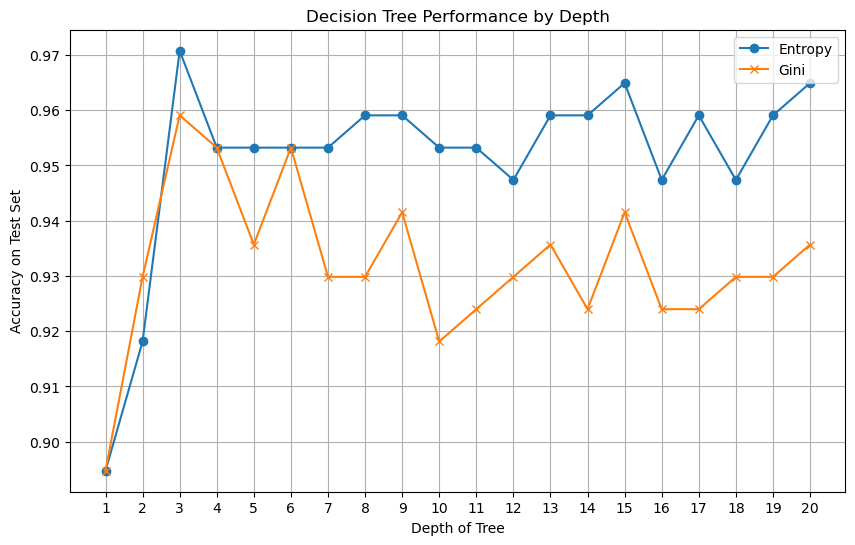

In [17]:
# Plot the results

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_scores_entropy, label='Entropy', marker='o')
plt.plot(depths, accuracy_scores_gini, label='Gini', marker='x')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy on Test Set')
plt.title('Decision Tree Performance by Depth')
plt.xticks(np.arange(1, 21, 1))
plt.legend()
plt.grid(True)
plt.show()

### Question 1e. Choose the best value for depth and visualize C1 and C2.

In [18]:
# Find the index of the highest accuracy for both Entropy and Gini

best_depth_index_entropy = np.argmax(accuracy_scores_entropy)
best_depth_index_gini = np.argmax(accuracy_scores_gini)

# Identifing the best depths

best_depth_entropy = depths[best_depth_index_entropy]
best_depth_gini = depths[best_depth_index_gini]

print(f"Best Depth for Entropy: {best_depth_entropy}")
print(f"Best Depth for Gini: {best_depth_gini}")


Best Depth for Entropy: 3
Best Depth for Gini: 3


In [19]:
#Training the Decision Trees at Best Depths

dt_entropy_best = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth_entropy)
dt_gini_best = DecisionTreeClassifier(criterion='gini', max_depth=best_depth_gini)

dt_entropy_best.fit(X_train, y_train)
dt_gini_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
#Visualizing the best trees

def visualize_best_tree(model, feature_names, class_names, filename):
    # Generate DOT data
    dot_data = export_graphviz(model, out_file=None,
                               feature_names=feature_names,
                               class_names=class_names,
                               filled=True, rounded=True,
                               special_characters=True)
    
    # Create Graph from DOT data
    
    graph = graphviz.Source(dot_data)
    graph.render(filename, format='png', cleanup=True)  # Output as PNG file
    return graph

#Output is saved as .png files

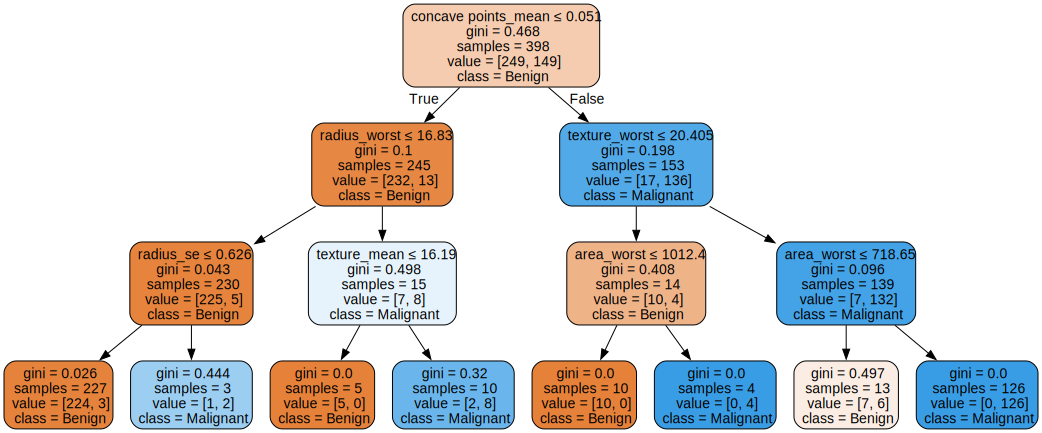

In [21]:
# Visualize the best trees

visualize_best_tree(dt_entropy_best, feature_names, class_names, 'best_tree_entropy')
visualize_best_tree(dt_gini_best, feature_names, class_names, 'best_tree_gini')

### Question 2a. Train an RF classifier with 10 estimators and compare the performance for the test set with C1.

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions with the Random Forest classifier

y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy for the Random Forest classifier

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.9707602339181286


In [24]:
#Comparing with Decision Tree Classifier(C1)

from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree using Entropy

dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X_train, y_train)

# Make predictions and calculate accuracy for C1

y_pred_entropy = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Decision Tree (Entropy) Accuracy: {accuracy_entropy}")

Decision Tree (Entropy) Accuracy: 0.9473684210526315


In [25]:
#Comparing their performances

print(f"Random Forest (10 estimators) Accuracy: {accuracy_rf}")
print(f"Decision Tree (Entropy) Accuracy: {accuracy_entropy}")


Random Forest (10 estimators) Accuracy: 0.9707602339181286
Decision Tree (Entropy) Accuracy: 0.9473684210526315


### Question 2b. Change the number of estimators from 10, 50, 100, 500, 1000, and plot the performance.

In [26]:
# List of number of estimators to evaluate

n_estimators_list = [10, 50, 100, 500, 1000]
rf_accuracies = []

In [27]:
# Loop through each number of estimators, train RF classifier, and record accuracy

for n_estimators in n_estimators_list:
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    rf_accuracies.append(accuracy)

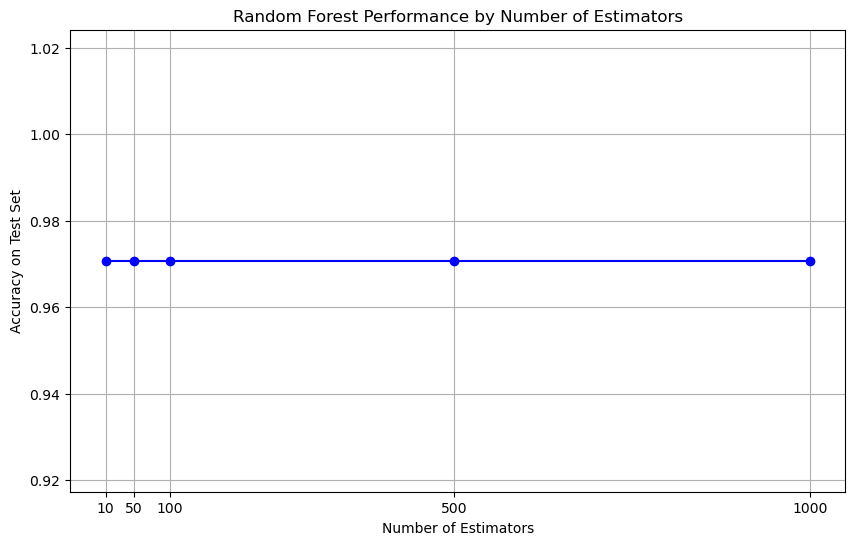

In [28]:
# Plotting the performance

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, rf_accuracies, marker='o', linestyle='-', color='b')
plt.title('Random Forest Performance by Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy on Test Set')
plt.xticks(n_estimators_list)
plt.grid(True)
plt.show()

#### Since it shows a straight line - it suggests that the performance of the Random Forest classifier is not sensitive to the number of trees, within the range being tested.  

### Question 2c. Perform 5 fold cross-validation and report the performance for RF classifier with 50 estimators

In [29]:
from sklearn.model_selection import cross_val_score

#Adding Estimators = 50 and a random state of 42

rf_classifier_50 = RandomForestClassifier(n_estimators=50, random_state=42)

#Performing 5 fold cross validation for 50 estimators

cv_scores = cross_val_score(rf_classifier_50, X, y, cv=5)

cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"CV Mean Accuracy: {cv_mean:.4f}")
print(f"CV Standard Deviation: {cv_std:.4f}")

CV Mean Accuracy: 0.9543
CV Standard Deviation: 0.0244


### Question 2d. Plot the feature importance for RF with 200 estimators using the mean decrease in impurity and also feature permutation and explain the plots.

In [30]:
from sklearn.inspection import permutation_importance

In [31]:
# Train a Random Forest classifier with 200 estimators

rf_classifier_200 = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier_200.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [32]:

# Feature Importance based on mean decrease in impurity

importances = rf_classifier_200.feature_importances_
indices = np.argsort(importances)[::-1]

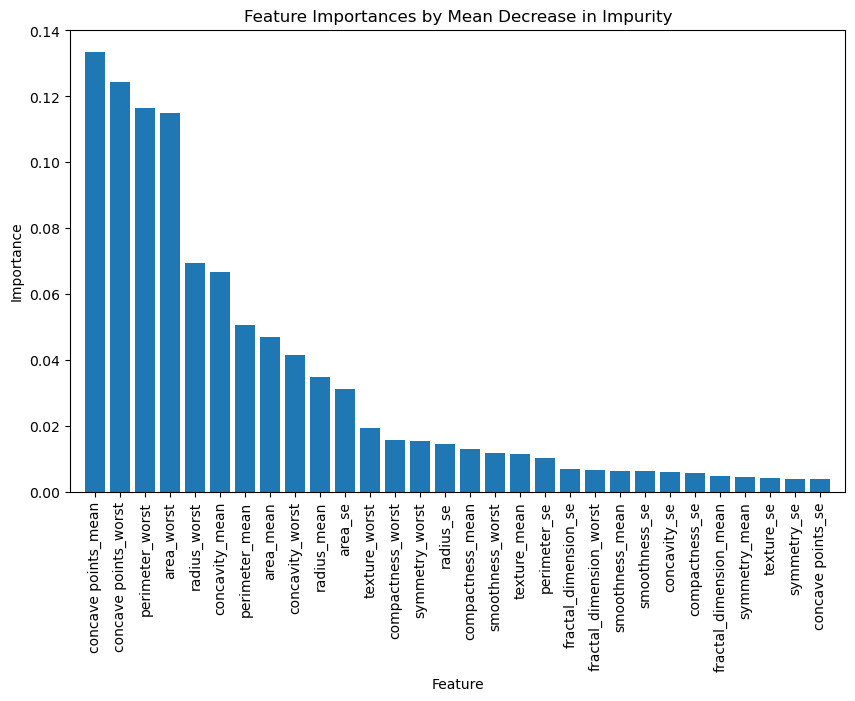

In [33]:
# Plotting Feature Importance based on mean decrease in impurity

plt.figure(figsize=(10, 6))
plt.title("Feature Importances by Mean Decrease in Impurity")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

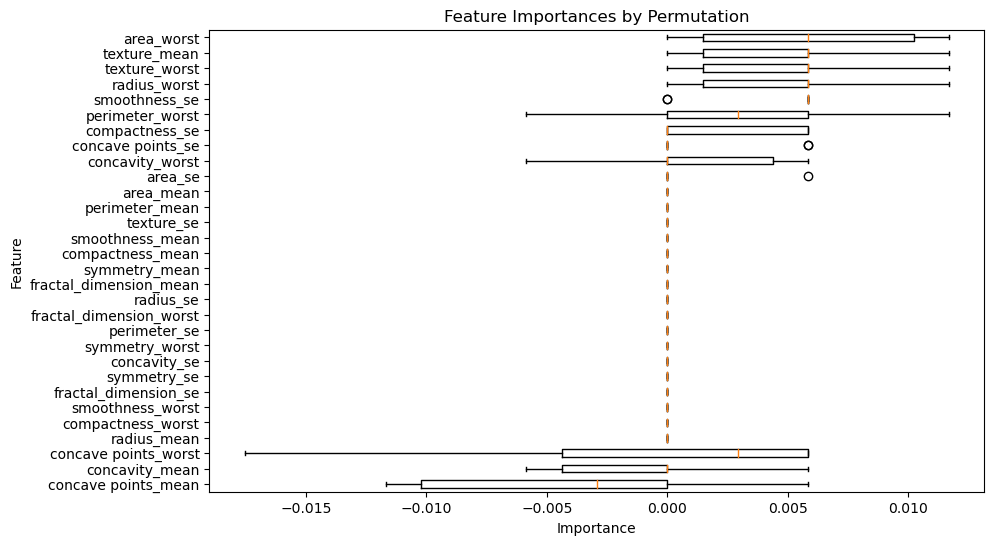

In [34]:
# Feature Permutation Importance

result = permutation_importance(rf_classifier_200, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()

# Plotting Permutation Importance

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=[X_test.columns[i] for i in sorted_idx])
plt.title("Feature Importances by Permutation")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Question 3a. Train a classifier with 10 estimators and compare the performance with C1 and RF in 2a.

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
ada_classifier = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=42)

In [37]:
# Making predictions on the test set

y_pred_ada = ada_classifier.predict(X_test)

In [38]:
# Calculate the accuracy of the AdaBoost classifier

accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Classifier Accuracy: {accuracy_ada}")

AdaBoost Classifier Accuracy: 0.9707602339181286


#### Comparing performances with C1 and RF

In [39]:
print(f"Decision Tree (Entropy) Accuracy: {accuracy_entropy}")
print(f"Random Forest (10 Estimators) Accuracy: {accuracy_rf}")
print(f"AdaBoost (10 Estimators) Accuracy: {accuracy_ada}")


Decision Tree (Entropy) Accuracy: 0.9473684210526315
Random Forest (10 Estimators) Accuracy: 0.9707602339181286
AdaBoost (10 Estimators) Accuracy: 0.9707602339181286


### Question 3b. Change the number of estimators from 10, 50, 100, 500, 1000,and plot the performance.

In [40]:
# Initializing the list of number of estimators

n_estimators_list = [10, 50, 100, 500, 1000]
ada_accuracies = []

In [41]:
# GOing through each number of estimators

for n_estimators in n_estimators_list:
    
    # Train AdaBoost classifier with the current number of estimators
    
    ada_clf = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    ada_clf.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    
    y_pred_ada = ada_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_ada)
    
    # Append the accuracy to the list
    
    ada_accuracies.append(accuracy)

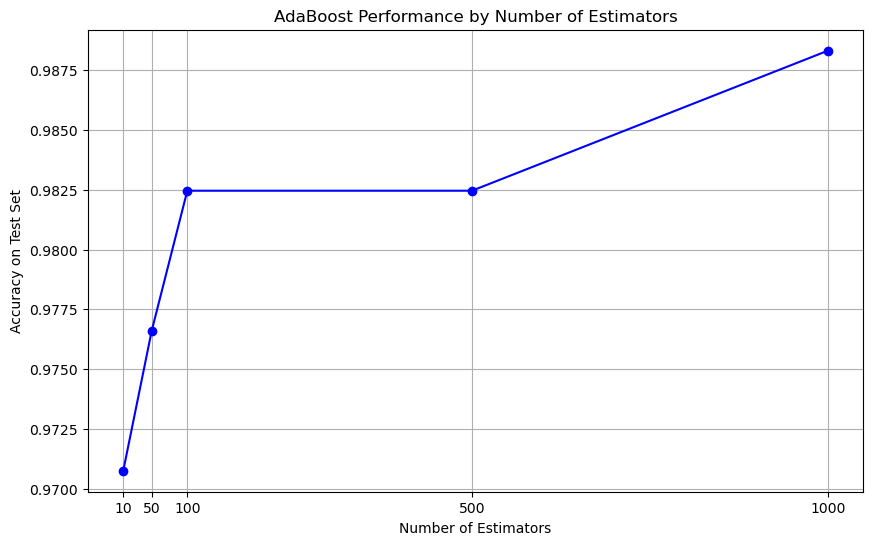

In [42]:
# Plotting the performance

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, ada_accuracies, marker='o', linestyle='-', color='b')
plt.title('AdaBoost Performance by Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy on Test Set')
plt.xticks(n_estimators_list)
plt.grid(True)
plt.show()

### Question 3c. Perform 5 fold cross-validation and report the performance for classifier with 50 estimators.

In [43]:
# Train an AdaBoost classifier with 50 estimators and perform 5-fold cross-validation
ada_classifier_50_cv = AdaBoostClassifier(n_estimators=50, random_state=42)


In [44]:
# Perform 5-fold cross-validation and calculate mean accuracy
cv_scores_ada_50 = cross_val_score(ada_classifier_50_cv, X, y, cv=5, scoring='accuracy')

In [45]:
# Calculate mean and standard deviation of the cross-validation scores
cv_mean_ada_50 = cv_scores_ada_50.mean()
cv_std_ada_50 = cv_scores_ada_50.std()

print(f"Mean CV Accuracy for AdaBoost with 50 estimators: {cv_mean:.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_std:.4f}")

Mean CV Accuracy for AdaBoost with 50 estimators: 0.9543
Standard Deviation of CV Accuracy: 0.0244


### Question 4. Train a classifier and compare the performance for the test set with C1 and 2a and 3a.

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
#Training the Gaussian Naive Bayes classifier

In [48]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb = gnb_classifier.predict(X_test)

# Calculate the accuracy of the Gaussian Naive Bayes classifier
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Classifier Accuracy: {accuracy_gnb}")


Gaussian Naive Bayes Classifier Accuracy: 0.9415204678362573


In [49]:
print(f"Decision Tree (Entropy - C1) Accuracy: {accuracy_entropy}")  # Replace accuracy_c1 with the actual value
print(f"Random Forest (10 Estimators - 2a) Accuracy: {accuracy_rf}")  # Replace accuracy_rf with the actual value
print(f"AdaBoost (50 Estimators - 3a) Accuracy: {accuracy_ada}")  # Replace accuracy_ada with the actual value
print(f"Gaussian Naive Bayes Classifier Accuracy: {accuracy_gnb}")


Decision Tree (Entropy - C1) Accuracy: 0.9473684210526315
Random Forest (10 Estimators - 2a) Accuracy: 0.9707602339181286
AdaBoost (50 Estimators - 3a) Accuracy: 0.9707602339181286
Gaussian Naive Bayes Classifier Accuracy: 0.9415204678362573


### Question 5. Use PCA and print the Cumulative proportion. Using Cumulative proportion, only keep the features that account for more than 95% (ratio of variance to keep) of the total variation associated with all the original variables.

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [51]:
# Separate features and target, assuming the target is the last column
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]  # Target variable

#### Here, I am preprocessing the data since initially a ValueError message arrived - because the dataset contains non-numeric data

#### I am thereby applying hot encoding to the categorical data to convert them into a numeric format suitable for PCA

In [52]:
# Encoding all the categorical data
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [53]:
# Identify categorical columns in X
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [54]:
# Create a ColumnTransformer to encode categorical columns
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

In [55]:
# Apply the preprocessing to the features
X_processed = preprocessor.fit_transform(X)

#### PCA can now be applied

In [56]:
# Apply PCA
pca = PCA()
pca.fit(X_processed)

PCA()

In [57]:
# Calculate the cumulative variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

In [58]:
# Determine the number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

In [59]:
print("Cumulative variance ratio by component:", cumulative_variance_ratio)
print(f"Number of components to retain 95% of variance: {n_components_95}")


Cumulative variance ratio by component: [0.98204421 0.99822069 0.9997782  0.99989926 0.99998754 0.99999419
 0.99999821 0.99999903 0.99999942 0.99999973 0.99999991 0.99999997
 0.99999998 0.99999999 0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
Number of components to retain 95% of variance: 1


### Question 5b. Train an RF classifier with 100 estimators using the dataset with reduced features and compare the performance with RF with 100 estimators using all the features.

In [60]:
from sklearn.model_selection import train_test_split


In [61]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [62]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_reduced, X_test_reduced, _, _ = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [64]:
# Original dataset
rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

In [65]:
# Reduced dataset
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = rf_reduced.predict(X_test_reduced)

In [66]:
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)

print(f"Accuracy with original features: {accuracy_original}")
print(f"Accuracy with PCA-reduced features: {accuracy_reduced}")

Accuracy with original features: 0.9707602339181286
Accuracy with PCA-reduced features: 0.8538011695906432
